# SoS Notebook

SoS Notebook is a **multi-language notebook** that allows the use of multiple kernels in a single notebook with data exchange among live kernels, a **Jupyter frontend to the SoS workflow engine** to allows local and remote analysis of large datasets, with an **enhanced Jupyter frontend** that provides features such as line by line execution of cell contents. The unique combination of a multi-language kernel and a workflow engine allows easy transition from interactive data analysis to batch data processing workflows.

## Installing the SoS kernel <a id="Installing_the_SoS_kernel"></a>

Please follow the instructions in [Running SoS](https://vatlab.github.io/sos-docs/#runningsos) to install `sos`, `sos-notebook`, and relevant language modules. After the installation of `sos-notebook`, you should be able to see `sos` from the output of:

In [1]:
!jupyter kernelspec list

Available kernels:
  bash         /Users/bpeng1/Library/Jupyter/kernels/bash
  imatlab      /Users/bpeng1/Library/Jupyter/kernels/imatlab
  ir           /Users/bpeng1/Library/Jupyter/kernels/ir
  julia-0.6    /Users/bpeng1/Library/Jupyter/kernels/julia-0.6
  python3      /Users/bpeng1/anaconda3/share/jupyter/kernels/python3
  sos          /Users/bpeng1/anaconda3/share/jupyter/kernels/sos


To create a SoS notebook, start a Jupyter server using command
```
$ jupyter notebook
```
and select a `SoS` kernel for your new notebook.

SoS by default records runtime signatures and skip commands that have been executed successfully. Here we change the default signature mode to disallow this feature.

In [2]:
%set -s ignore

Set sos options to "-s ignore"


## User Interface <a id="User_Interface"></a>

![user_interface](../media/JupyterNotebook.png)

The SoS frontend is based on the Jupyter notebook frontend but adds a dropdown list and a button to the menu bar, a side panel, and dropdown lists for all code cell.

### cell content <a id="cell_content"></a>

A SoS Jupyter notebook accepts the following types of cells:

|Cell type | Content |Interpreted by| Behavior |
|----------|-----------------|----------|
|**Markdown**| Markdown text |Jupyter| can be evaluated to have title, table etc|
|**Subkernel**| Statements in other languages with optional SoS magics| Subkernels| SoS prepares statements and evaluate them in subkernels such as R. |
|**SoS**| SoS statements without section header| SoS | Evaluate the cell as a SoS step in a persistent SoS dictionary.|
|**Workflow**| SoS statements with section header | SoS | Can only be executed by magic `%run` (workflow in the current cell) or `%sosrun` (workflow in the entire notebook).|

The **markdown cells** contains Markdown text and are rendered by Jupyter. These cells are used for displaying rich-format texts such as title and table. Most of the content of this documentation is written in such cells.

The kernel of each **code cell** is marked by the language selector at the top-right corner of each code cell, and by the color of the prompt area of the cell. For example, the following cell is a code cell with kernel `R`.

In [3]:
paste('This', 'is', 'cool', '!')

[1] "This is cool !"

A cell with a SoS kernel can be either a **SoS cell** or a **Workflow cell**, with the latter containing **section headers**. A scratch cell is executed immediately with a persistent SoS dictionary so that you can execute arbitrary SoS (Python) statements,

In [4]:
print('This is a scratch cell')

This is a scratch cell


or a single SoS step without header

In [5]:
%preview -n rand.txt
output: 'rand.txt'
R: expand=True
    cat(rnorm(5), file='{_output}')

> rand.txt (49 B):

1.486479 -0.9230241 0.3021701 -0.1997381 2.336216

The last type of SoS cell contains formal definition of SoS steps. These cells define complete SoS workflows and can only be executed by SoS magics (with magics `%run` or `%sosrun`) in Jupyter or by SoS commands from command line. For example, executing the following cell would not execute any statement.

In [6]:
[test_20]
print(f"This is step {step_name} of a workflow")

and you can execute the cell with a SoS magic `%run`.

In [7]:
%run wf
[wf_20]
print(f"This is step {step_name} of a workflow")

This is step wf_20 of a workflow


What is even more magical about these cells is that they form **notebook workflows** that consist of all sections defined in the Jupyter notebook. A `%sosrun` magic would collect all workflow stepss in a notebook and execute them.

In [8]:
%sosrun wf
[wf_30]
print(f"This is step {step_name} of a workflow")

This is step wf_20 of a workflow
This is step wf_30 of a workflow


SoS provides a rich environment for you to analyze data in different languages. Generally speaking, you can

* Use subkernels to analyze data interactively using different languages.
* Use SoS cells to execute complete (and separate) scripts to analyze data or test steps of workflows, and
* If needed, convert SoS cells to workflow cells to create complete workflows to analyze data in batch mode.

### Switch between kernels <a id="Switch_between_kernels"></a>

You can also enter any statement for any other (installed) kernel after you switch to the subkernel. The switch can be down either programmatically using magics `%with` or `%use`, or interactively using the language selection drop downs.

1. A dropdown list at the top right corner of each cell displays the current kernel for the cell. You can change the kernel used for the cell by selecting another kernel from the list. This will start the cell with the specified kernel, although another kernel can still be used if the cell contains kernel switching magics `%use` or `%with`.

2. A dropbown list in the notebook toolbar lists the global default kernel that would be used for new cell. Changing the kernel from the tool bar effectively executes a `%use KERNEL` command. It will also change the kernel of any new cell to that kernel.

### Side panel <a id="Side_panel"></a>

SoS provides a side panel that can be toggled by a cube icon next to the language selection dropdown. The side panel contains a special cell that is used for two purposes:

1. A scratch cell using which you can evaluate any expression and check its results. 
2. A preview cell in which the `%preview` magic of any cell would be executed if the side panel is open.

The input area of the panel cell has a dropdown button that allows you to execute a few frequently executed magics and previous executed statements.

Because this cell is not part of the main notebook, its output will not be saved with the notebook. This allows you to test commands, check environment, values of variables and content of files without affecting the content of the notebook.


### Keyboard Shortcuts <a id="Keyboard_Shortcuts"></a>

In addition to shortcuts defined by Jupyter (e.g. `Ctrl-Enter` to evaluate a cell and `Shift-Enter` to evaluate a cell and move next), the SoS kernel defines the following shortcuts

1. `Ctrl-Shift-Enter` This shortcut **send selected text or current line if there is no selection to the panel cell for evaluation**, using the kernel of the current cell. This effectively allows you to evaluate content of a cell line by line.
2. `Ctrl-Shift-t` executes magic `%toc` that **displays the table of content of the current notebook** in the side panel, allowing you to easily navigate within a (long) notebook.
3. `Ctrl-Shift-O` (output) **toggles a code cell tag `show_output`** and mark the output with a gray bar to the right of the output area, or toggle a markdown cell tag `hide_output`. The tags will be rendered accordingly in HTML reports generated using sos templates.
4. `Ctrl-Shift-v` (paste-table) If you have a table copied from external sources such as HTML page or excel file and if you are inside of a markdown cell, this shortcut **pastes table as markdown code to the current cell**. This allows easy copy of tables to SoS notebook.
5. `Ctrl-Shift-m` (markdown) **toggle a cell between markdown and code type**, which can be easier to use than select code or markdown cell type from tool bar.
6. `Ctrl-B` toggles side-panel. This is for compatibility with the toc2 extension of Jupyter notebook.

### Other usage hints <a id="Other_usage_hints"></a>

1. **Paste pictures from clipboard**: You can paste image from clipboard directly to a markdown cell of the Jupyter notebook using `Ctrl-V` (or `Cmd-V` under Mac OS X). The key here is that you should select a markdown cell before pasting.
2. **Drag and drop figures**: You can drag a picture and drop it to a markdown cell of the Jupyter notebook.
3. **Tab completion**: You can use tab to complete keyword, magics (enter `%` and press `TAB` to get a list of magics), variable name, function name, file name etc.
4. **Inspect name**: You can place your cursor inside a keyword, function name, magic etc, and press `CTRL-TAB` to inspect it. SoS will show variable name,, help message etc depending on the keyword that is being inspected.

### How to get help <a id="How_to_get_help"></a>

It is recommended that you go through this document and understand how SoS Notebook works, but it is of course not possible for you to memorize all the magics, SoS actions and their options. To get help, you can

1. For a complete reference, visit the [documentation page of SoS](https://vatlab.github.io/SoS/#documentation).
2. For a list of available magics, type `%` and `TAB` (completion).
3. For help on a particular magic, execute the magic with option `-h` (e.g. `%run -h`) in the side panel. Alternatively, you can place your cursor on `%run` and press `CTRL-TAB` to get a short description of magic.
4. For help on a SoS action (e.g. `python`), place your cursor on the action name (e.g. before `:` on `python:`), press `CTRL-TAB` to get the help message of the action.

## Preview of results <a id="Preview_of_results"></a>

Instant preview of intermediate results is extrmely useful for interactive data analysis. SoS provides rich and extensible preview features to

* preview files in many different formats, 
* preview variables and expressions in SoS and subkernels,
* show preview results temporarily in the side panel or permanently in the main notebook, and
* generate interactive tables and plots for better presentation of data both in Jupyter notebook and in converted HTML reports.

### Magic `%preview`  <a id="Magic_preview"></a>

SoS provides a `%preview` magic to preview files and variables (and their expressions) after the completion of a cell. By default, `%preview` displays results in the side panel if the side panel is open, and otherwise in the main notebook. You can override this behavior with options `-p` (`--panel`) or `-n` (`--notebook`) to always display results in the side panel or notebook.

For example, in a subkernel R, you can do

In [9]:
%preview a.png
%use R
png("a.png")
plot(seq(1,10, 0.1), sin(seq(1,10, 0.1)))
dev.off()

pdf 
  2

to preview `a.png` generated by this cell. The figure will be displayed in the side panel if the side panel is open, or otherwise in the main notebook.

The `%preview` magic also accept sos variable and expressions. For example, the following example previes variable `mtcars` in a R kernel. 

In [10]:
%preview -n mtcars

>>> mtcars:

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


You can also specify expressions to be reviewed, but similar to command line arguments, you will need to quote the expression if it contains spaces. For example,

In [11]:
%preview -n rownames(mtcars) mtcars['gear']

>>> rownames(mtcars):

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

>>> mtcars['gear']:

,gear
Mazda RX4,4
Mazda RX4 Wag,4
Datsun 710,4
Hornet 4 Drive,3
Hornet Sportabout,3
Valiant,3
Duster 360,3
Merc 240D,4
Merc 230,4
Merc 280,4


If option `-w` (`--workflow`) is specified, sos collects workflow steps from the current notebook and preview it. This would give you a better sense of what would be saved with magic `%sossave` or executed with magic `%sosrun`.

In [12]:
%preview --workflow

#!/usr/bin/env sos-runner
#fileformat=SOS1.0

[test_20]
print(f"This is step {step_name} of a workflow")

[wf_20]
print(f"This is step {step_name} of a workflow")

[wf_30]
print(f"This is step {step_name} of a workflow")

[example_step]
print(f"This is {step_name}")

[example_step_1]
print(f"This is {step_name}")

[example_step_10]
print(f"This is {step_name}")

[example_step_20]
print(f"This is {step_name}")

[example_step_15]
print(f"This is {step_name} with option {var}")

[example_step_25]
print(f"This is {step_name}")

[global]
var = 'this is global'

[stepA]
parameter: var = 20
print(f"{step_name} with parameter {var}")

[master]
sos_run('stepA', var=30)

Magic `%preview` also accepts an option `--off`, in which case it turns off the preview of output files from the SoS workflow.

### Preview variables from another kernel <a id="Preview_variables_from_another_kernel"></a>

The `%preview` magic previews the variables with the kernel using which the cell is evaluated. For example, even if you have `var` defined in both SoS and `R` kernel,

In [13]:
val = [2,3]*2

In [14]:
val = rep(c(1, 2), 3)

In [15]:
%preview -n val

>>> val:

[1] 1 2 1 2 1 2

In [16]:
%preview -n val

>>> val:

[2, 3, 2, 3]

Note that SoS also displays type information of variables in the SoS kernel, including row and columns for data frames, but not in subkernels. 

If you would like to preview variable in another kernel, you can specify it using option `--kernel`, for example, the following cell previews a variable `r.val` in a SoS kernel.

In [17]:
%preview -n val --kernel R

>>> val:

[1] 1 2 1 2 1 2

### Preview of files <a id="Preview_of_files"></a>

The `%preview` magic can be used to preview files in a variety of formats. For example, the following cell download a bam file and use `%preview` magic to preview the content of the file to make sure the file has been downloaded correctly.

In [18]:
%preview -n issue225.bam
download:
  https://github.com/lomereiter/sambamba/raw/master/test/issue225.bam

issue225.bam:  use existing: 


0

> issue225.bam (4.2 KiB):

RG:
  ID: '16-3584'    PL: 'illumina'    PU: '16-3584'    SM: '16-3584'    
SQ:
  SN: 'chrM'    LN: 16571    


Similarly, you can preview files produced by another kernel

pdf 
  2

> test.png (20.5 KiB):

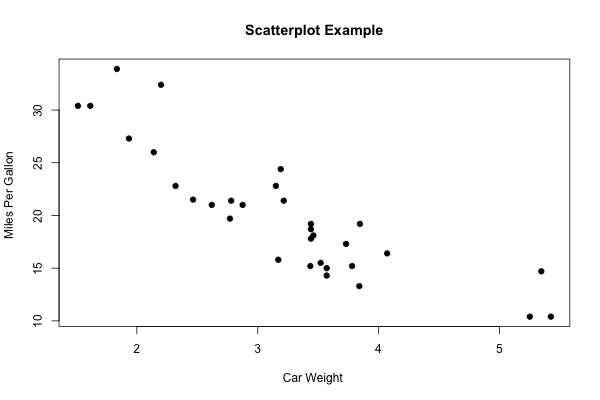

In [19]:
%preview test.png -n -s png
%use R
png('test.png', width=600, height=400)
attach(mtcars)
plot(wt, mpg, main="Scatterplot Example", 
  xlab="Car Weight ", ylab="Miles Per Gallon ", pch=19)
dev.off()

Note that SoS by default preview PDF files as an embeded object (iframe), but you can use option `-s png` to convert PDF to png to preview it as a image, if you have imagematick and Python package `wand` installed.

### Preview options <a id="Preview_options"></a>

The `%magic` accepts options that are format dependent. This table lists options that are available to specific file types. Options for previewing dataframes will be described later.

|file type| Option | description|
|--|--|--|
|pdf | `--style png` (`-s png`)| Convert PDF to png before preview. All pages are combined to produce a sngle PNG figure if the pdf file contains multiple pages. This option requires Python module `wand`.|
|    | `--pages 2 3 `| With `--style png`, preview specified pages (page numbers starting from 1) from a multi-page PDF file. |
|txt | `--limit lines` (`-l`) | Preview number of lines to preview for text files (not limited to files with extension `.txt`), default to `5`|

### Automatic preview <a id="Automatic_preview"></a>

SoS will automatically preview results of Python assignments when you send statements to the sidepanel for execution. For example, if you do execute the following cell with `Ctrl-Shift-Enter`,

In [20]:
s='12345'

The cell would be executed in the side panel as
```
%preview s
s='12345'
```
which allows instant feedback when you step through your code.

SoS would also automatic preview results from SoS workflows that are specified with statement `output:`. For example, the following SoS cell executes a scratch step (step without section head) and generates output `a.png`. The figure would be automatically displayed in the side panel after the step is executed.

In [21]:
output: 'a.png'
R: expand=True
png("{_output}")
plot(seq(1,10, 0.1), sin(seq(1,10, 0.1)))
dev.off()   

null device 
          1 


### Preview of remote files <a id="Preview_of_remote_files"></a>

When a workflow or a task is executed remotely (see [Remote Execution](Remote_Execution.html) for details, result files might be on a remote host that is unavailable for local preview. In this case, you can specify the host with option `-r HOST` and preview files remotely. This essentially executes a command `sos preview -r HOST FILE` on the remote host and allows you to preview content of (large) files without copying them locally.

For example, you can execute a workflow on a remote host `dev` to generate a file (`mygraphic.png`) and use `%preview -r dev` to preview it.

INFO: Executing default_0: 
INFO: input:   []
null device 
          1 
INFO: output:   []
INFO: Workflow default (ID=66883cd586652ae0) is executed successfully.


%preview mygraphic.png -r dev

> mygraphic.png (14.0 KiB):

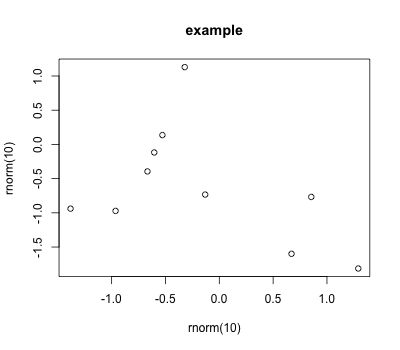

In [22]:
%preview -n mygraphic.png -r dev
%run -r dev
R:
  png(file="mygraphic.png",width=400,height=350)
  plot(x=rnorm(10),y=rnorm(10),main="example")
  dev.off()


### Preview of tables <a id="Preview_of_tables"></a>

If a data to be previewed is a Pandas DataFrame (or a csv or excel file which would be previewed as a DataFrame), SoS will preview it as a sortable and searchable table. For example, the following cell get a data.frame `mtcar` from the R kernel (as a pandas DataFrame) and preview it in the main notebook:

In [23]:
%get mtcars --from R
%preview -n mtcars 

Loading required package: feather


>>> mtcars:

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


Compared to previewing the same variable in R, you have the addition features of

1. sorting table by clicking the sort icon at the header of each column
2. displaying a subset of rows that matches specified text in the input text

Note that SoS by default outputs the first 200 rows of the table. You can use option `-l` (`--limit`) to change this threshold.

What makes this feature particularly interesting is that the table will be sortable and searchable when you save the jupyter notebook in HTML format (through command `sos convert analysis.ipynb analysis.html --template sos-report` or magic `%sossave --to html`).

### Scatter Plot <a id="Scatter_Plot"></a>

The tablular preview of Pandas DataFrame is actually using the default `table` style of `%preview`. If you have one or more numeric columns, you can use the `scatterplot` style of `%preview` to view the data. For example, the following command plots `mpg` vs `disp` of the `mtcars` dataset, stratified by `cyl`.

In [24]:
%preview mtcars -n -s scatterplot mpg disp --by cyl

>>> mtcars:

The advantage of this scatterplot is that you can see a description of data when you hover over the data points, which can be more informative than static figures produced by, for example, R.

The `scatterplot` style provides a number of options and you can use option `-h` with `-s` to display them:

In [25]:
%preview mtcars -s scatterplot -h

usage: %preview -s scatterplot [-h] [--ylim YLIM YLIM] [--xlim XLIM XLIM]
                               [--log {x,y,xy,yx}] [--width WIDTH]
                               [--height HEIGHT] [-b BY [BY ...]]
                               [--show SHOW [SHOW ...]]
                               [-t [TOOLTIP [TOOLTIP ...]]] [-l LIMIT]
                               [cols [cols ...]]

positional arguments:
  cols                  Columns to plot, which should all be numeric. If one
                        column is specified, it is assumed to be a x-y plot
                        with x being 0, 1, 2, 3, .... If two or more columns
                        (n) are specified, n-1 series will be plotted with the
                        first column being the x axis, in which case an
                        "_index" name can be used to specify 0, 1, 2, 3, ....
                        This option can be igured if the dataframe has only
                        one or two columns.

optional argum

For example, you can show more tooltips and multiple columns as follows:

In [26]:
%preview mtcars -n -s scatterplot _index disp hp mpg --tooltip wt qsec

>>> mtcars:

### Command `sos preview` <a id="Command_sos_preview"></a>

The `%preview` magic has a command line counterpart `sos preview`. This command cannot display any figure but can be convenient to preview content of compressed files and files that are not previewed by the operating system (e.g. `bam` files). The `-r` option is especially useful in previewing files on a remote host without logging to the remote host or copying the files to local host.

## Execution of Workflows <a id="Execution_of_Workflows"></a>

We have discussed markdown cells, subkernel cells, and SoS cells, which can be considered as a subkernel cell with SoS (Python) kernel. SoS notebook supports another type of cell, namely **workflow cell**.

A workflow cell is a SoS cell with one or more formal **SoS steps**, which are marked by a **section header**. In summary,

* A workflow cell can contain a complete workflow and be executed by magic `%run`.
* Sections defined in all workflow cells in a notebook form **notebook workflows**, which can be executed by magic `%sosrun` or by command `sos run` (or `sos-runner`) from command line.

### Magic `%run` <a id="Magic_run"></a>

Magic `%sos` executes the content of a cell, prepended with all `[global]` sections defined in the notebook, as a complete SoS workflow in a separate namespace.

For example, the following workflow cell defines a SoS step, but SoS Notebook will ignore it when you execute it with `Ctrl-Enter`.

In [27]:
[example_step]
print(f"This is {step_name}")

You can only execute such a cell with magic `%run`:

In [28]:
%run
[example_step_1]
print(f"This is {step_name}")

This is example_step_1


The `%run` magic treats the content of the cell as a SoS workflow so you can put multiple sections in the cell

In [29]:
%run
[example_step_10]
print(f"This is {step_name}")

[example_step_20]
print(f"This is {step_name}")

This is example_step_10
This is example_step_20


You can have global section, define parameter, and execute the workflow multiple times with multiple `%run` magics:

In [30]:
%run
%run --var 200

parameter: var = 100

[example_step_15]
print(f"This is {step_name} with option {var}")

[example_step_25]
print(f"This is {step_name}")

This is example_step_15 with option 100
This is example_step_25
This is example_step_15 with option 200
This is example_step_25


It is important to remember that the workflow is executed in its own namespace so it needs to be self-contained. That is to say, if you define a variable in the SoS namespace,

In [31]:
var = 500

The variable is not available to the workflow

In [32]:
%sandbox --expect-error
%run
print(var)

this is global


so you will have to pass it to the workflow as command line options

In [33]:
%run --var {var}
parameter: var = int
print(var)

> %run --var 500

500


If you have multiple such definitions or if you have function definitions, you can define them in a `[global]` section, which will be executed before the cell workflow. 

In [34]:
[global]
var = 'this is global'

In [35]:
%run
print(var)

this is global


Similar to command line tool `sos run`, magic `%run` accepts a large number of parameters. Please refer to the output of `%run -h` for details.

### Magic `%sosrun` <a id="Magic_sosrun"></a>

Magic `%sosrun` is similar to `%sos` in its ability to execute workflows with many options, with the major difference in that it execute **notebook workflows**, which are defined by all sections defined in the notebook. The notebook workflow can be displayed with magic `%preview --workflow` and is the workflow that will be executed if the notebook is executed from the command line with command `sos run` or `sos-runner`.

It is worth noting that magics `%sosrun` and `%run` can be used together, so that you can run single workflows with `%run` and multiple workflows with `%sosrun`. For example, you can debug and execute single workflows with magic %run`

In [36]:
%run stepA --var 10

[stepA]
parameter: var = 20
print(f"{step_name} with parameter {var}")

stepA_0 with parameter 10


and execute many such workflows in batch mode with magic `%sosrun`:

In [37]:
%sosrun master

[master]
sos_run('stepA', var=30)

stepA_0 with parameter 30


## Conversion between `.ipynb` and `.sos` files
 <a id="Conversion between `.ipynb` and `.sos` files
"></a>
You can save a Jupyter notebook with SoS kernel to a SoS script using `File -> Download As -> SoS` from the browser, or using command

```
$ sos convert myscript.ipynb myscript.sos
```

By default, **only workflow cells will be saved to a `.sos` file to create a SoS script in correct syntax**. You can also save all cells, including cells in other kernels in a '.sos' file using option `--all`, although the resulting `.sos` file might not be executable in bath mode.

You can convert an `.sos` script to `.ipynb` format using command

```
$ sos convert myscript.sos myscript.ipynb
```

or even to an executed notebook with option `--execute`

```
$ sos convert myscript.sos myscript.ipynb --execute
```

and SoS will either assign each SoS step to a cell, or split the workflow according to some cell magic if the `.sos` was exported with the `--all` option.

Please refer to the tutorial on [File Conversion](../tutorials/File_Conversion.html) for details of these commands.

## Convert `.ipynb` to HTML format <a id="Convert_ipynb_to_HTML_format"></a>

Because it is not particularly easy to open an `.ipynb` file (a live Jupyter server is required) and because of risk of changing the content of an `.ipynb` file, it is often desired to save an `.ipynb` file in HTML format.

Jupyter makes use of a template system to control the content and style of exported HTML file. For example, you can use the default Jupyter template (`File` -> `Save As` -> `HTML`) to save all input and output cells, or you can use the [hide code Jupyter extension](https://github.com/kirbs-/hide_code) to manually hide input or output of each cell and produce a customized .HTML file.

SoS provides its own `template` called `sos-report`, which can be used from command line using command

```
sos convert analysis.ipynb analysis.html --template sos-report
```
or from within Jupyter with magic `%sossave` with specified filename

```
%sossave analysis.html -f
```
or using the same name as the notebook with option `--to html`
```
%sossave --to html -f
```

Option `-f` overrides existing file if an output file already exists. You could also use other `sos` based templates such as `sos-full`, which displays all cells.

The generated HTML file has the following properties

1. It by default only displays markdown cells, input and output cells with tag `report_cell`, and output cells with tag `report_output`.  This is the **report view** that only displays the results of interest.

2. If you point your mose to the left top corner of the window, a display control panel will be displayed for you to select additional items to display, including all input and output cells, input and output prompts, and various messages. This is the **notebook view** that displays all the details of the analysis.

The `report_output` tag can be toggled using keyboard shortcut `Ctrl-Shift-O` and cells with this tag will be marked by a gray bar to the right of the output area. The `report_cell` and `scratch` tag has to be manually added through the `tag` toolbar (`View` -> `Cell Toolbar` -> `Tags`). Whereas `report_output` only works for output of code cells, the `scratch` tag applies to both markdown and code cells. Finally, if you have created your own customized template, you can define `sos-default-template` in a configuration file (eg. `sos config --set sos-default-template mytemplate.tpl`) instead of specifying it with option `--template` each time.
